In [1]:
import numpy as np
import pandas as pd
import pyvista as pv
from scipy.interpolate import griddata

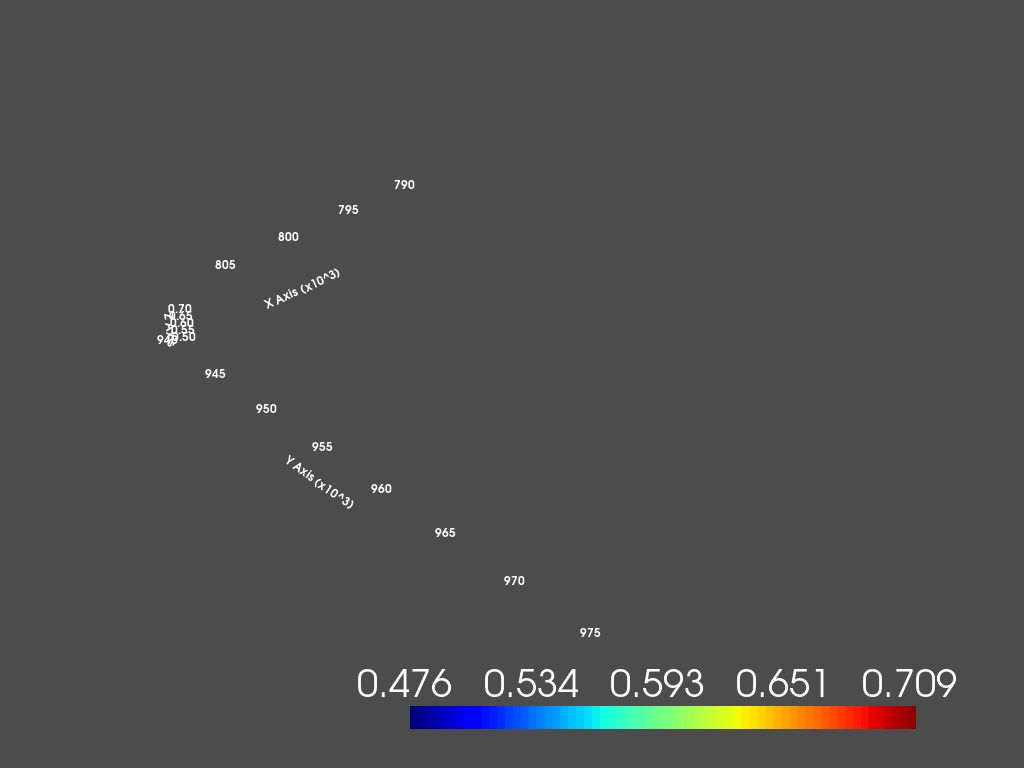

In [2]:
data = pd.read_csv(r"F:\Komputer\Materi\Software\Python\Project\DATA_GEOSCIENCE\DATA_SUMUR_DAN_SEISMIK\3DHorizons.csv")
shor = data[data["Horizon"] == 'Carlile']  # grab specific hors
shor = shor[['X', 'Y', 'Time']]
shor[shor==-999.9900] = np.nan
shor = shor.dropna(how='any')

x = shor.X
y = shor.Y
z = shor.Time

points = np.vstack((x,y)).T
x, y = np.mgrid[min(points[:,0]):max(points[:,0]):1000j, min(points[:,1]):max(points[:,1]):1000j]
zi = griddata(points, z, (x, y), method='linear')
grid = pv.StructuredGrid(x, y, zi)

plotter = pv.Plotter()
plotter.add_mesh(grid, scalars=zi, cmap='jet', lighting=False)
plotter.set_scale(xscale=1, yscale=1, zscale = 10000)
plotter.add_scalar_bar()
plotter.show_bounds(grid='back', location='outer', ticks='both')
plotter.show()